# Introduction

The purpose of this Jupyter notebook is to perform tests of the Lookback option for adaptiveness.

## Importing

Before runing the code blocks, import the following in the code block below.

In [26]:
import numpy as np
import qmcpy as qp
dims=16
abs_tol=1e-3

## Defined Functions

The following function(s) are defined for convinence for testing.

In [27]:
def test_lookback(dims = 16, abs_tol = 1e-3, volatility=0.2, start_price=100, interest_rate=0.05, call_put='call'):
    """
    Used to easily test LookBackOption class.
    dims: The number of dimensions.
    abs_tol: Absolute tolerance.
    """
    aco = qp.LookBackOption(volatility=volatility, start_price=start_price, interest_rate=interest_rate, call_put=call_put)
    kde, a, b, approx_solution, data = qp.CubQMCSobolG(aco, abs_tol).density_estimation()
    print("Lookback Option value: %.5f (to within %1.e) with %d paths" % (approx_solution, abs_tol, data.n_total))
    print("Discounted payoff %f" % (aco.get_discounted_payoffs()))

# European Option

The following is the European option. Lookback is to be similar to this for adaptiveness.

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 149.94265233804686


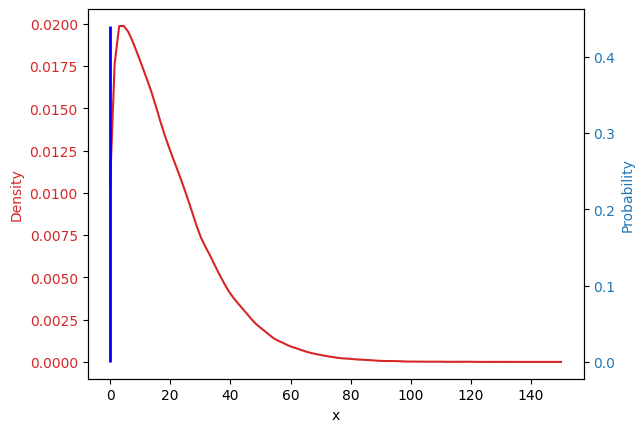

European Option value: 10.45020 (to within 1e-03) with 262144 paths


In [28]:
aco = qp.EuropeanOption(qp.Sobol(dims), volatility=0.2, start_price=100, strike_price=100, interest_rate=.05, call_put='call')
kde,a,b, approx_solution, data = qp.CubQMCSobolG(aco, abs_tol).density_estimation()
print("European Option value: %.5f (to within %1.e) with %.f paths"% (approx_solution, abs_tol, data.n_total))

# Lookback Option

The following is to test Lookback for adaptiveness.

## Call Lookback Option

The following is to test `LookBackOption` for when it is a "call."

**Call** means that the we are buying something. Specificially, we have the right to buy, but not the obligation, to buy something at a later date for a *pre*-specified price, known as the **strike price**.

### Test 1

Uses similar paramters like European call option.

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 193.89048352670324


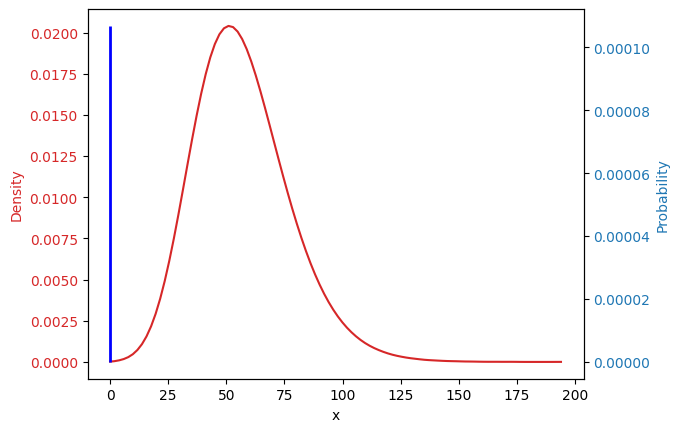

Lookback Option value: 56.83704 (to within 1e-03) with 65536 paths
Discounted payoff 3.106968


In [29]:
test_lookback()

### Test 2

- Volatility: 0.5
- Start Price: 100
- Interest Rate: 0.05

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 940.7827553948649


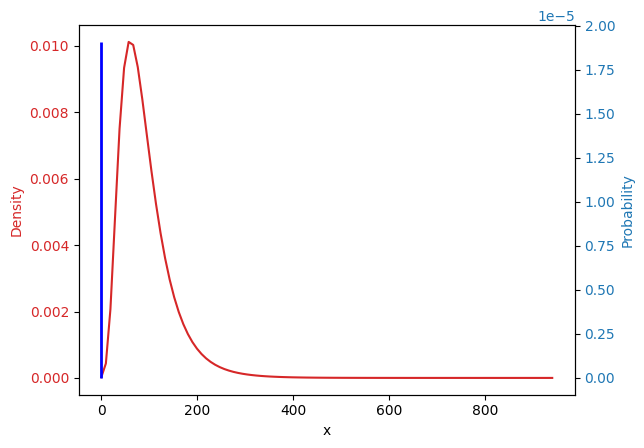

Lookback Option value: 91.34205 (to within 1e-03) with 524288 paths
Discounted payoff 0.000000


In [30]:
test_lookback(volatility=0.5)

### Test 3

- Volatility: 0.01
- Start Price: 100
- Interest Rate: 0.05

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 7.47693134431889


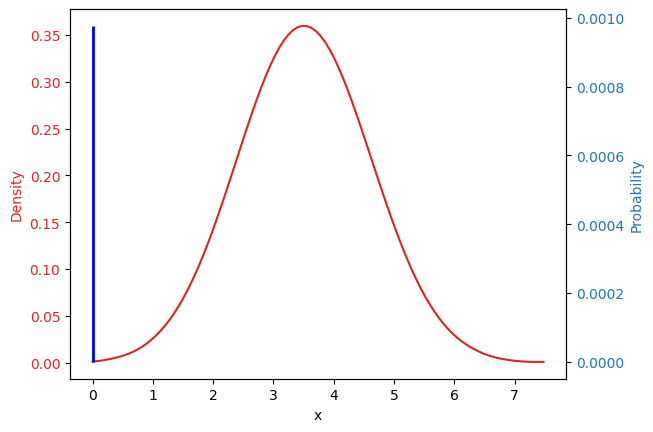

Lookback Option value: 3.51558 (to within 1e-03) with 2048 paths
Discounted payoff 5.122108


In [31]:
test_lookback(volatility=0.01)

### Test 4

- Volatility: 0.8
- Start Price: 100
- Interest Rate: 0.05

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 4652.50861429131


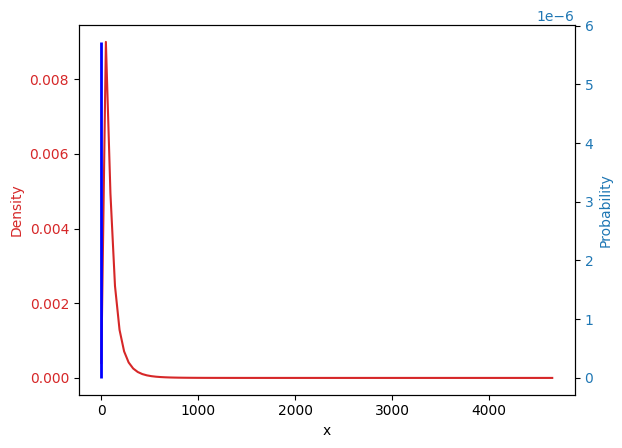

Lookback Option value: 98.55471 (to within 1e-03) with 2097152 paths
Discounted payoff 0.000000


In [32]:
test_lookback(volatility=0.8)

### Test 5

- Voltility: 0.2
- Start Price: 500
- Interest Rate: 0.05

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 1029.2302985935808


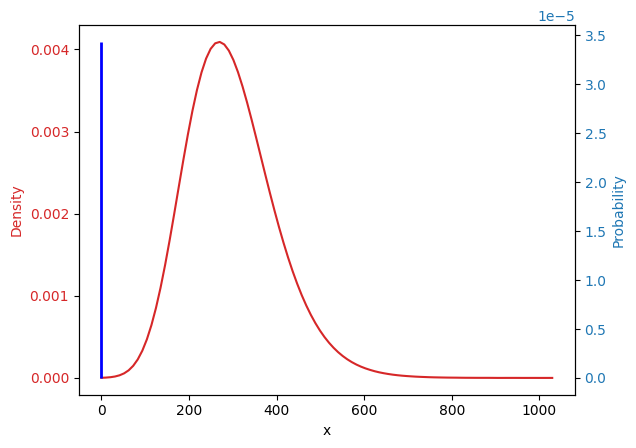

Lookback Option value: 296.86247 (to within 1e-03) with 262144 paths
Discounted payoff 15.534883


In [33]:
test_lookback(start_price=500)

### Test 6

- Volatility: 0.2
- Start Price: 100
- Interest Rate: 0.05
- Absolute Tolerance: `1e-5`

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 269.3365676762632


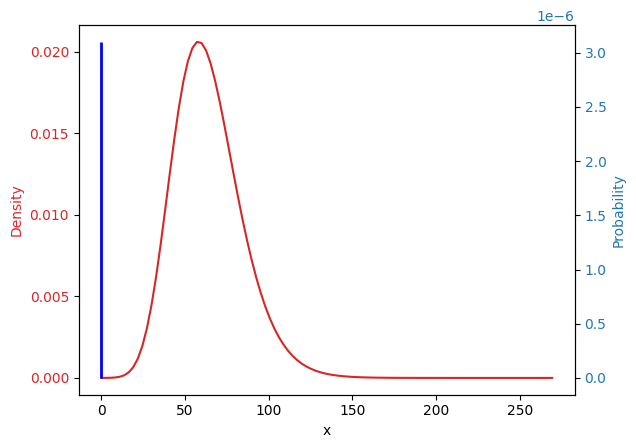

Lookback Option value: 63.80492 (to within 1e-05) with 4194304 paths
Discounted payoff 3.106975


In [34]:
test_lookback(abs_tol=1e-5)

When you decrease the absolute tolerance, the computation takes longer, which should be expected as smaller absolute tolerance means that you are trying to compute for higer precision.

### Test 7

- Volatility: 0.2
- Start Price: 100
- Interest Rate: 0.05
- Absolute Tolerance: `1e-3`
- Dimensions: 32

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 208.77581112509654


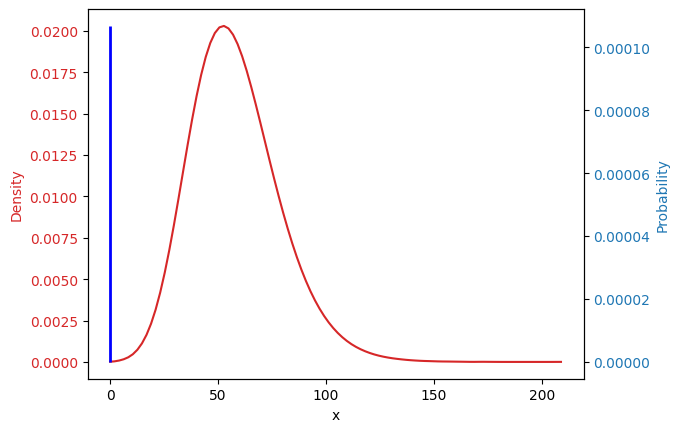

Lookback Option value: 57.96678 (to within 1e-03) with 65536 paths
Discounted payoff 3.106971


In [35]:
test_lookback(dims=32)

Increased the dimension by one power of 2. Was surprised that it did not take longer. Will try to do an exteremely high dimension next.

### Test 8

- Volatility: 0.2
- Start Price: 100
- Interest Rate: 0.05
- Absolute Tolerance: `1e-5`
- Dimension: 128

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 188.49648826887403


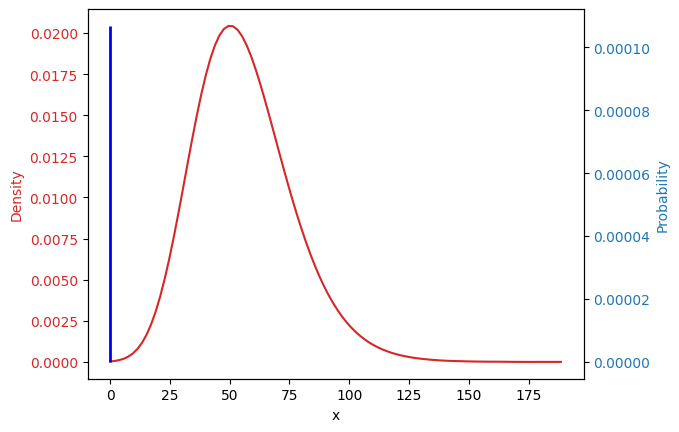

Lookback Option value: 55.90709 (to within 1e-03) with 65536 paths
Discounted payoff 3.106973


In [36]:
test_lookback(dims=128)

Going to 128 dimensions also did not take too long. Interesting results.

### Test 9

- Volatility: 0.5
- Start Price: 100
- Interest Rate: 0.05
- Absolute Tolerance: `1e-3`
- Dimensions: 128

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 827.5716004902482


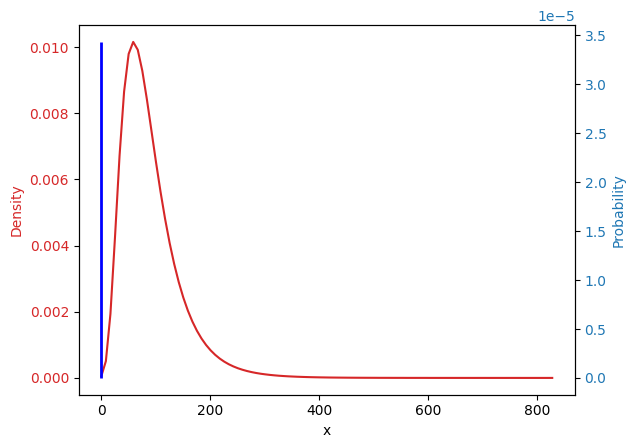

Lookback Option value: 89.72871 (to within 1e-03) with 262144 paths
Discounted payoff 0.000000


In [37]:
test_lookback(dims=128, volatility=0.5)

## Put Lookback Option

Lower bound of estimation interval (a) is: 0.0
Upper bound of estimation interval (b) is: 189.7104072923997


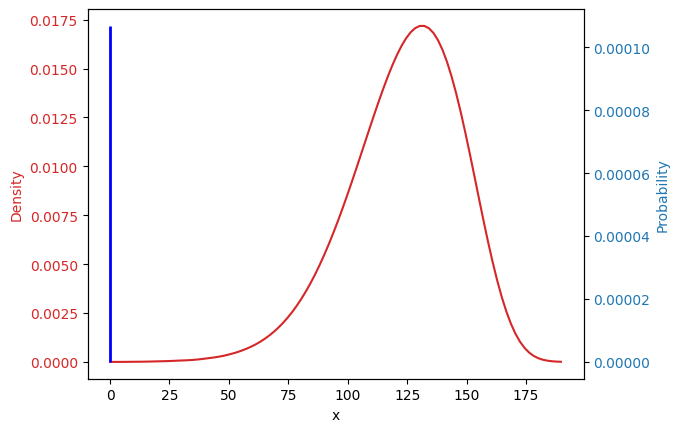

European Option value: 123.81539 (to within 1e-03) with 65536 paths


In [38]:
aco = qp.LookBackOption(volatility=0.2, start_price=100, interest_rate=.05, call_put='put')
kde, a, b, approx_solution, data = qp.CubQMCSobolG(aco, abs_tol).density_estimation()
print("European Option value: %.5f (to within %1.e) with %.f paths"% (approx_solution, abs_tol, data.n_total))

In [39]:
aco.get_discounted_payoffs()

0.0

# Lookback Option Multilevel Dimension

The following is to test for multilevel dimensions for the Lookback option.